In [1]:
import glob

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

import pandas as pd

from PIL import Image 
import matplotlib.pylab as plt

In [2]:
dicc_data = {
    'dia': [],
    'tipo': [],
    'titulo': [],
    'contenido': [],
    'tamanio': []
}

for file in glob.iglob('news/**/*.txt', recursive=True):
    listado = file.replace('/', '\\').split('\\')
    #print(listado)
    with open(file, encoding='UTF-8') as f:
        new = f.read()
        dicc_data['dia'].append(listado[1])
        dicc_data['tipo'].append(listado[2])
        dicc_data['titulo'].append(listado[-1].split('.')[0])
        dicc_data['contenido'].append(new)
        dicc_data['tamanio'].append(len(new.split(' ')))
        
data = pd.DataFrame(dicc_data)
del dicc_data
data.head(20)

,dia,tipo,titulo,contenido,tamanio
0,01082021,descartado,coronavirus-bolivia-en-vivo-hoy-sabado-31-de-j...,Bolivia registró este sábado 15 fallecidos a c...,406
1,01082021,descartado,coronavirus-estados-unidos-vacunados-contra-el...,En otro desalentador revés a las acciones de E...,460
2,01082021,descartado,coronavirus-japon-tokio-registra-por-primera-v...,"Las autoridades de la capital de Japón, Tokio,...",232
3,01082021,descartado,coronavirus-sputnik-v-las-demoras-quejas-y-can...,El gobierno peruano adquirió recientemente 20 ...,904
4,01082021,descartado,coronavirus-usa-joe-biden-el-presidente-de-est...,"El presidente de Estados Unidos, Joe Biden, ha...",264
5,01082021,descartado,covid-19-coronavirus-no-podran-trabajar-hacer-...,Arabia Saudita prohíbe a partir de este doming...,376
6,01082021,descartado,covid-19-estudios-cientificos-erroneos-aliment...,Estudios científicos con metodología deficient...,709
7,01082021,original,bono-600-link-revisa-aqui-si-eres-beneficiario...,La pandemia de coronavirus ha dejado a muchas ...,365
8,01082021,original,covid-19-conoce-los-paraderos-donde-se-entrega...,La Autoridad de Transporte Urbano para Lima y ...,277
9,01082021,original,covid-19-cuales-son-las-restricciones-para-el-...,Las personas que viven en Lima y Callao tendrá...,741


In [3]:
data['dia'] = pd.to_datetime(
    data['dia'], errors='coerce', format='%d%m%Y'
)
data.tail()

,dia,tipo,titulo,contenido,tamanio
430,2021-07-31,original,tokio-2020-por-que-protestan-los-japoneses-con...,"Al menos una media del 56,4 % en Tokio y sus a...",559
431,2021-07-31,original,vacuna-covid-19-aislamiento-por-renato-cisnero...,"Se suponía que, llegadas las últimas semanas d...",707
432,2021-07-31,original,vacuna-covid-19-minsa-informa-que-este-fin-de-...,El Ministerio de Salud (Minsa) informó que est...,265
433,2021-07-31,original,vacunacion-covid-19-minsa-informo-que-ya-se-in...,El Ministerio de Salud (Minsa) informó que más...,167
434,2021-07-31,original,variante-delta-del-covid-19-cevallos-confirma-...,"El ministro de Salud, Hernando Cevallos, infor...",219


In [4]:
data['tipo'].unique()

array(['descartado', 'original', 'parseado'], dtype=object)

In [5]:
data['dia'].unique()

array(['2021-08-01T00:00:00.000000000', '2021-10-02T00:00:00.000000000',
       '2021-10-03T00:00:00.000000000', '2021-07-04T00:00:00.000000000',
       '2021-09-05T00:00:00.000000000', '2021-07-11T00:00:00.000000000',
       '2021-09-12T00:00:00.000000000', '2021-06-14T00:00:00.000000000',
       '2021-07-14T00:00:00.000000000', '2021-12-15T00:00:00.000000000',
       '2021-07-17T00:00:00.000000000', '2021-07-18T00:00:00.000000000',
       '2021-09-18T00:00:00.000000000', '2021-12-18T00:00:00.000000000',
       '2021-09-19T00:00:00.000000000', '2021-06-26T00:00:00.000000000',
       '2021-09-26T00:00:00.000000000', '2021-06-27T00:00:00.000000000',
       '2021-06-28T00:00:00.000000000', '2021-06-29T00:00:00.000000000',
       '2021-07-29T00:00:00.000000000', '2021-07-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [6]:
descarte = data[data['tipo'] == 'descartado']
data = data[data['tipo'] == 'original']

descarte.shape, data.shape

((108, 5), (326, 5))

In [7]:
tamnio = data.groupby(by=['dia']).agg({'tamanio': ['mean', 'min', 'max']}).sort_index().iloc[8:]
tamnio

tamanio           
                  mean  min   max
dia                              
2021-07-17  355.678571  148   678
2021-07-18  363.500000  154   631
2021-07-29  398.625000  156  1000
2021-07-31  385.888889  167   741
2021-08-01  343.266667  155   741
2021-09-05  452.000000  183  1406
2021-09-12  316.076923  182   642
2021-09-18  371.360000  171   931
2021-09-19  383.600000  195   731
2021-09-26  352.500000  195  1058
2021-10-02  351.923077  181   518
2021-10-03  344.320000  181  1018
2021-12-15  305.100000  149   832
2021-12-18  550.166667  196  1194

<AxesSubplot:xlabel='dia'>

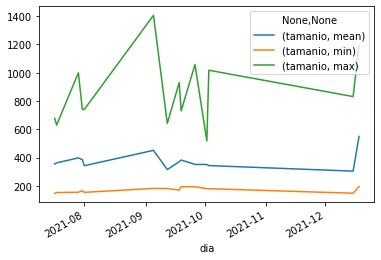

In [8]:
tamnio.plot()

In [9]:
contenido = data.groupby(by=['dia']).agg({
    'contenido': lambda _: '\n'.join(list(_)),
    'tamanio': 'sum'
}).sort_index().iloc[8:]
contenido

,contenido,tamanio
dia,,
2021-07-17,Debido a la pandemia del nuevo coronavirus muc...,9959
2021-07-18,"Este sábado 17 y domingo 18 de julio, las pers...",2908
2021-07-29,La ciudadanía puede verificar a través de la p...,3189
2021-07-31,La pandemia de coronavirus ha dejado a muchas ...,3473
2021-08-01,La pandemia de coronavirus ha dejado a muchas ...,5149
2021-09-05,El Ministerio de Salud (Minsa) informó que has...,2712
2021-09-12,"Desde la tercera semana de setiembre, se empez...",4109
2021-09-18,El Gobierno amplió las nuevas medidas sanitari...,9284
2021-09-19,El Gobierno habilitó oficialmente el portal pa...,3836


<AxesSubplot:xlabel='dia'>

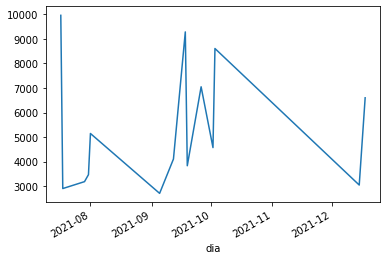

In [10]:
contenido.tamanio.plot()

In [11]:
contenido_descartado = descarte.groupby(by=['dia']).agg({'contenido': lambda _: '\n'.join(list(_))}).sort_index().iloc[0:]
contenido_descartado

,contenido
dia,
2021-07-04,"El presidente de Estados Unidos, Joe Biden, re..."
2021-07-11,Australia registró este domingo su primer muer...
2021-07-17,"Argentina recibió la noche del viernes 3,5 mil..."
2021-07-18,La organización de los Juegos Olímpicos y Para...
2021-07-29,"El presidente norteamericano, Joe Biden, está ..."
2021-08-01,Bolivia registró este sábado 15 fallecidos a c...
2021-09-12,"Brasil, uno de los países más castigados por l..."
2021-09-18,Bill Gates considera que el mundo no está real...
2021-10-02,El empresario de tecnología Traves Warner se q...


contenido    Colombia agregó este sábado 1.497 contagios y ...
Name: 2021-10-03 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    “Creo que la fase aguda de la pandemia llegará...
Name: 2021-12-15 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    “Creo que la fase aguda de la pandemia llegará...
Name: 2021-12-18 00:00:00, dtype: object <class 'pandas.core.series.Series'>


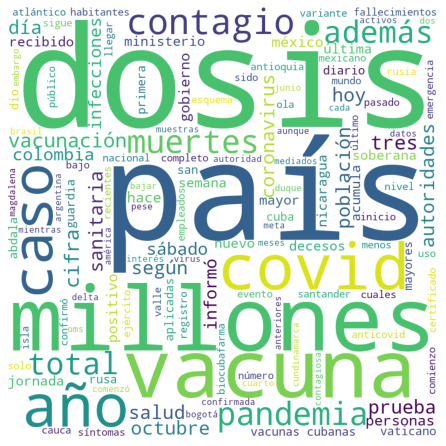

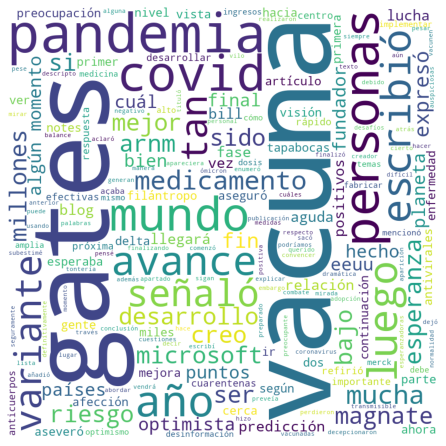

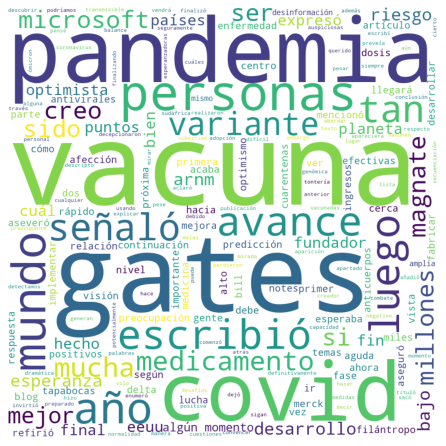

In [14]:
for row in contenido_descartado.iloc[-3:, :].iterrows():
    print(row[1], type(row[1]))
    comment_words = ''
    tokens = row[1]['contenido'].split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
    
    #comment_words = comment_words
    
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        stopwords=stopwords.words('spanish'),
        min_font_size = 10
    ).generate(comment_words)
    
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    

contenido    El Ministerio de Salud (Minsa) informó hoy, do...
tamanio                                                   8608
Name: 2021-10-03 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    El portavoz del Kremlin, Dmitri Peskov, explic...
tamanio                                                   3051
Name: 2021-12-15 00:00:00, dtype: object <class 'pandas.core.series.Series'>
contenido    El gigante tecnológico Apple anunció que suspe...
tamanio                                                   6602
Name: 2021-12-18 00:00:00, dtype: object <class 'pandas.core.series.Series'>


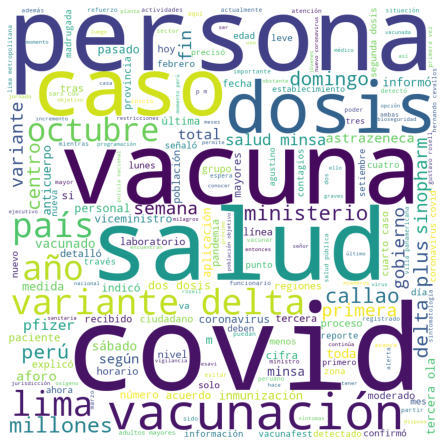

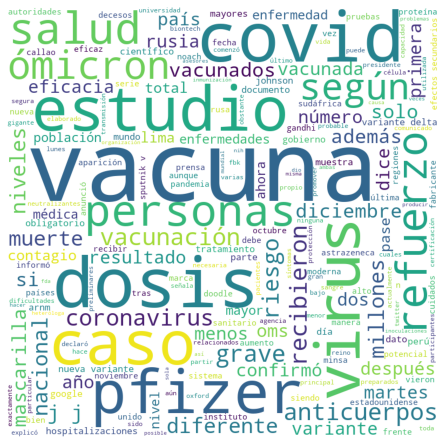

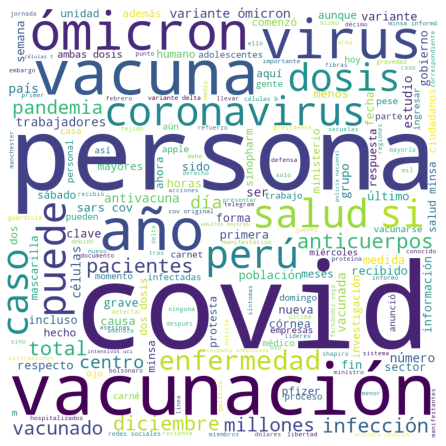

In [13]:
for row in contenido.iloc[-3:, :].iterrows():
    print(row[1], type(row[1]))
    comment_words = ''
    tokens = row[1]['contenido'].split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(
        width = 800, height = 800,
        background_color ='white',
        stopwords=stopwords.words('spanish'),
        min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)